<a href="https://colab.research.google.com/github/TabasomJebreili/real-estate-price-estimator/blob/main/Multivariable_Regression_and_Valuation_Model_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction

his project builds a Multivariable Linear Regression model to predict housing prices in 1970s Boston.
The model uses key neighborhood and housing features such as average number of rooms, crime rate, distance to employment centers, air pollution (NOx levels), and pupil–teacher ratio.
The workflow includes data cleaning, exploratory data analysis, model training, residual evaluation, and applying data transformations to improve prediction accuracy

In [ ]:
# %pip install --upgrade plotly

###  Import Statements


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
data = pd.read_csv('boston.csv', index_col=0)

### 📊 Dataset Summary: Boston Housing Data

The dataset includes **506 residential areas** in Boston from the 1970s, with **13 input features** and **1 target** (`PRICE`: median value of homes in $1000s).

**Key Features:**
- `CRIM` – Crime rate per capita  
- `ZN` – Residential land zoned for large lots  
- `INDUS` – Industrial zone proportion  
- `CHAS` – Charles River dummy (1 if next to river)  
- `NOX` – Air pollution (nitric oxide)  
- `RM` – Avg. number of rooms per dwelling  
- `AGE` – % of homes built before 1940  
- `DIS` – Distance to employment centers  
- `RAD` – Highway access index  
- `TAX` – Property tax rate  
- `PTRATIO` – Student–teacher ratio  
- `B` – 1000 × (Bk − 0.63)², Bk = % Black population  
- `LSTAT` – % of low-income population  
- `PRICE` – 🟡 Target: Median home value ($1000s)

✅ No missing values  
📎 Source: [UCI ML Repository](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/)  
📄 Paper: [Harrison & Rubinfeld (1978)](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/22636/0000186.pdf)

# Preliminary Data Exploration 🔎


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 59.3 KB


In [ ]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


In [ ]:
data.shape

(506, 14)

In [ ]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

## Data Cleaning - Check for Missing Values and Duplicates

In [ ]:
data.isna().values.any()

np.False_

In [ ]:
data.duplicated().values.any()

np.False_

In [ ]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


## Visualizing Key Features

To better understand the distribution and shape of important variables, we use Seaborn's `displot()` with KDE overlays for the following:

- `PRICE`: Median home value ($1000s)
- `RM`: Average number of rooms per dwelling
- `DIS`: Distance to employment centers
- `RAD`: Highway accessibility index

This helps assess skewness, modality, and outliers before modeling.

#### House Prices 💰

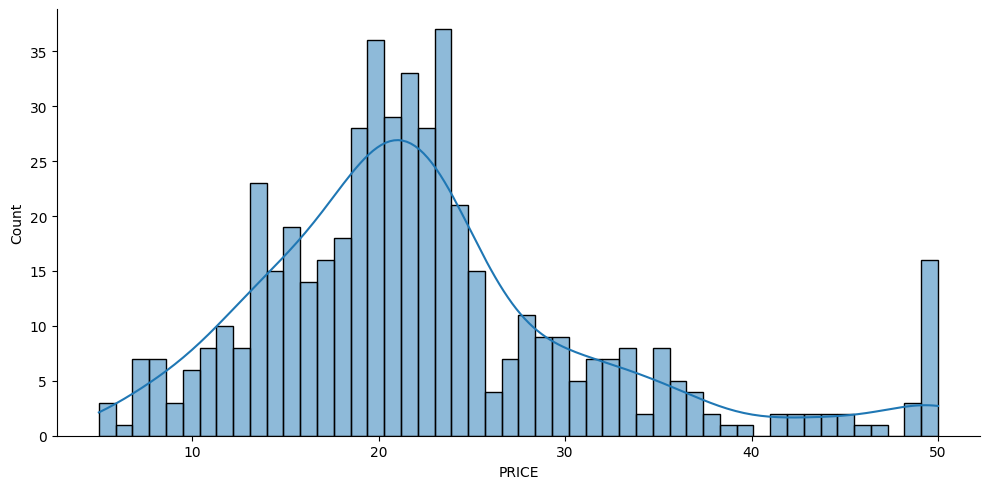

In [ ]:
sns.displot(data, x='PRICE', aspect=2, kind='hist', kde=True, bins=50)

#### Distance to Employment - Length of Commute 🚗

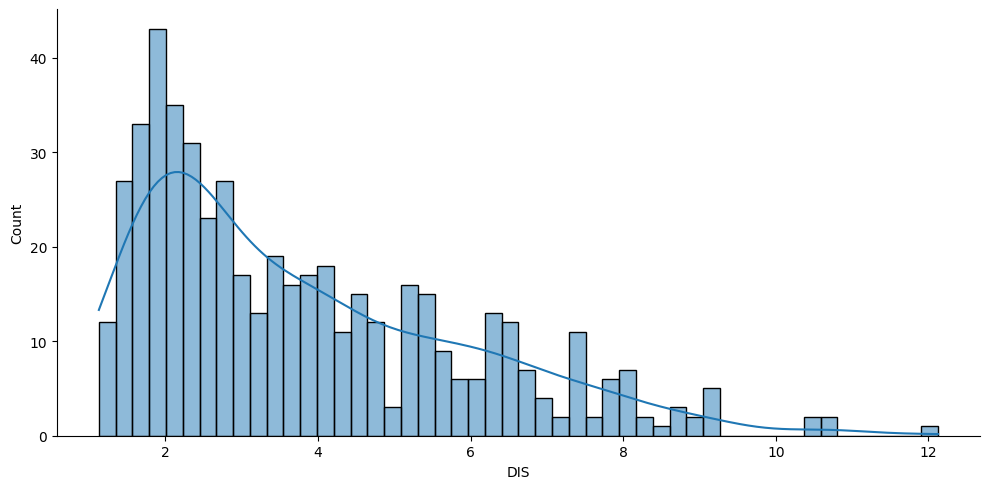

In [ ]:
sns.displot(data, x='DIS', aspect=2, kind='hist', kde=True, bins=50)

#### Number of Rooms

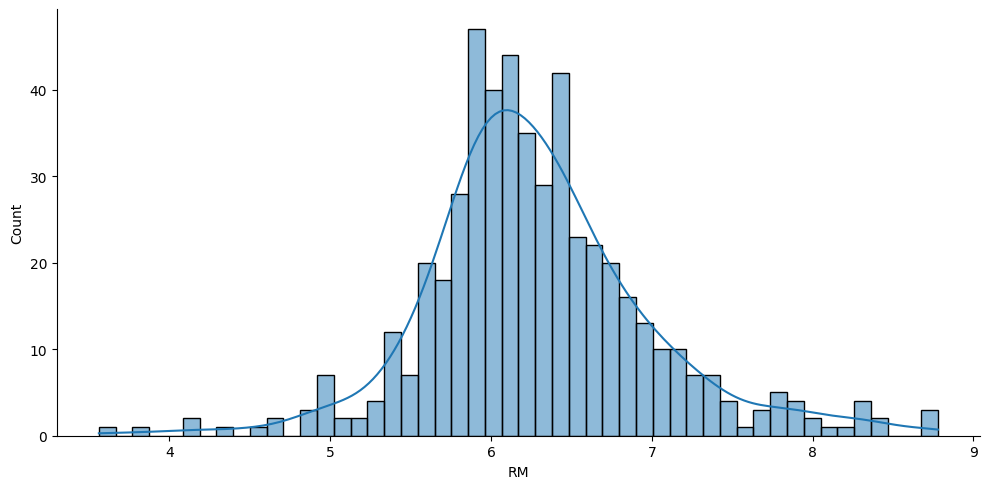

In [ ]:
sns.displot(data, x='RM', aspect=2, kind='hist', kde=True, bins=50)

#### Access to Highways 🛣

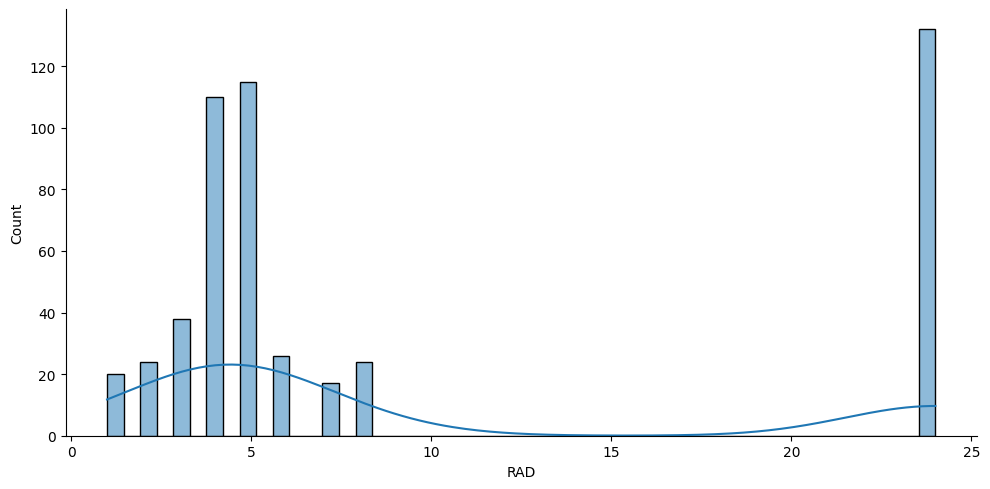

In [ ]:
sns.displot(data, x='RAD', aspect=2, kind='hist', kde=True, bins=50)

#### Next to the River?(bar char)


In [ ]:
near_far_river = data.CHAS.value_counts()

In [ ]:
near_far_river

,count
CHAS,
0.00,471
1.00,35


In [ ]:
bar = px.bar(x=["No", 'Yes'], y=near_far_river.values, color_continuous_scale="haline", color=near_far_river.index, title="Next to Charles River?")
bar.update_layout(xaxis_title="Propert Located Next to the River", yaxis_title="Number of Homes", coloraxis_showscale=False)

## Pairplot Analysis: Exploring Feature Interactions

To identify potential relationships and correlations among features, we use Seaborn’s `pairplot()` on a subset of the most relevant variables.

This includes:
- `NOX` (pollution) vs. `DIS` (distance to employment centers)  
- `RM` (average number of rooms) vs. `PRICE` (home value)  
- `LSTAT` (poverty level) vs. `PRICE`

These visual comparisons help us assess linearity, inverse relationships, and multicollinearity before building the regression model.


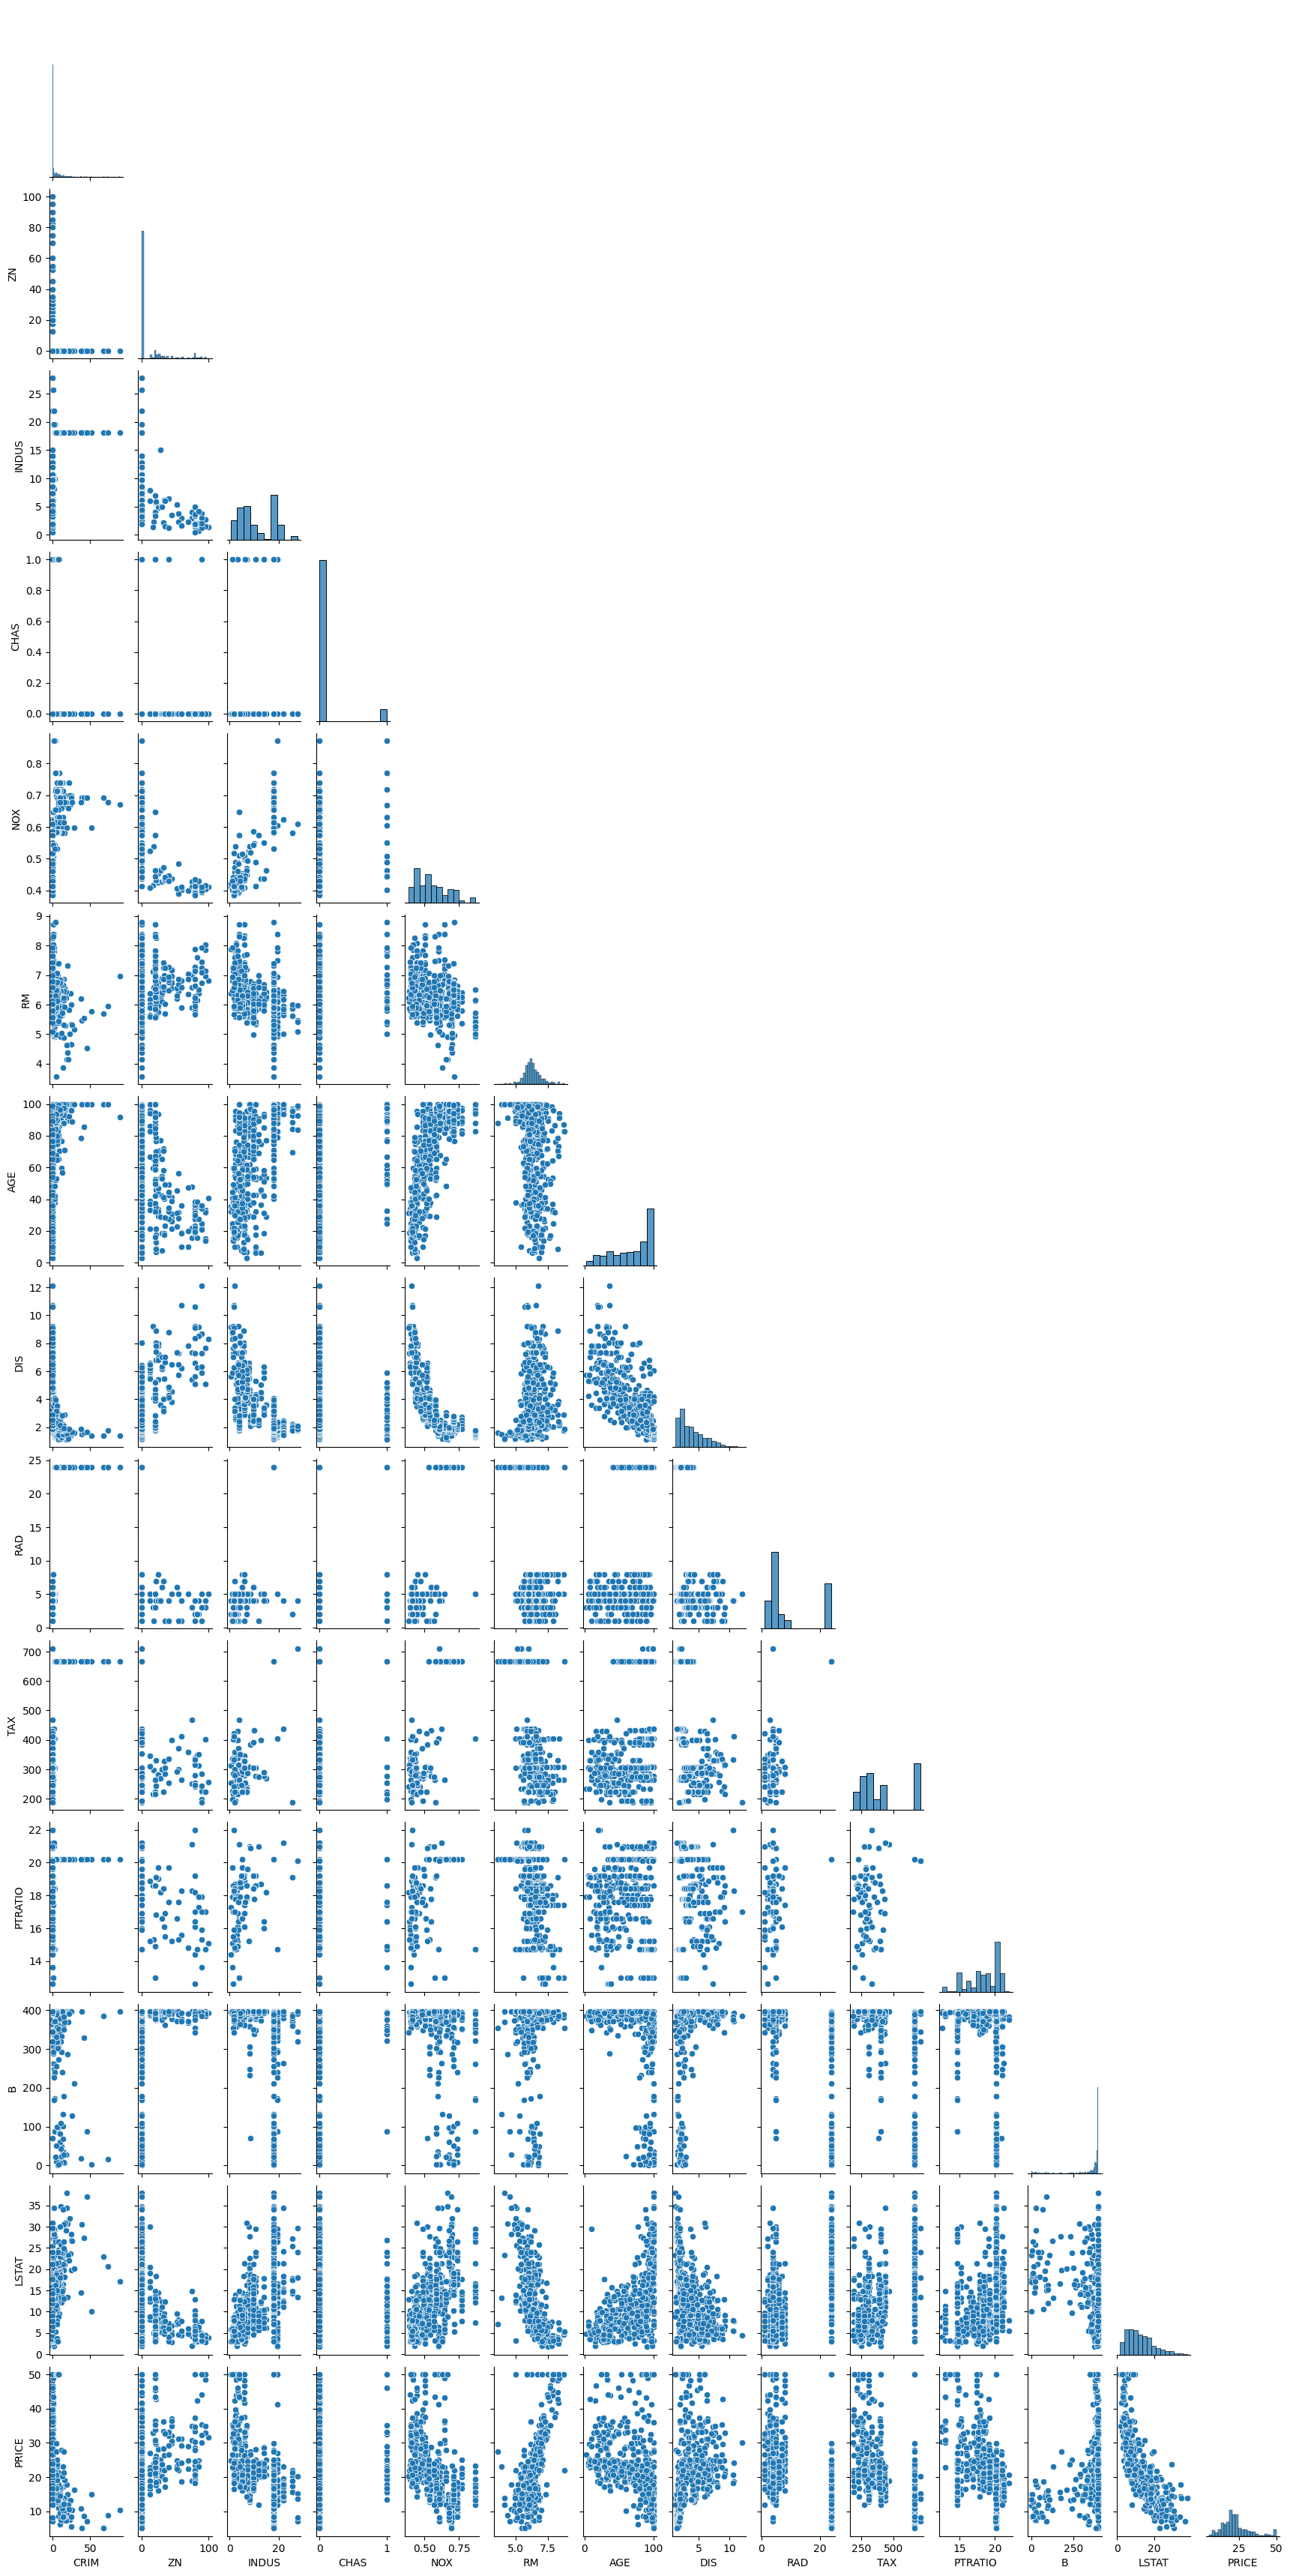

In [ ]:
sns.pairplot(data, corner=True, aspect=0.5)

#### Distance from Employment vs. Pollution


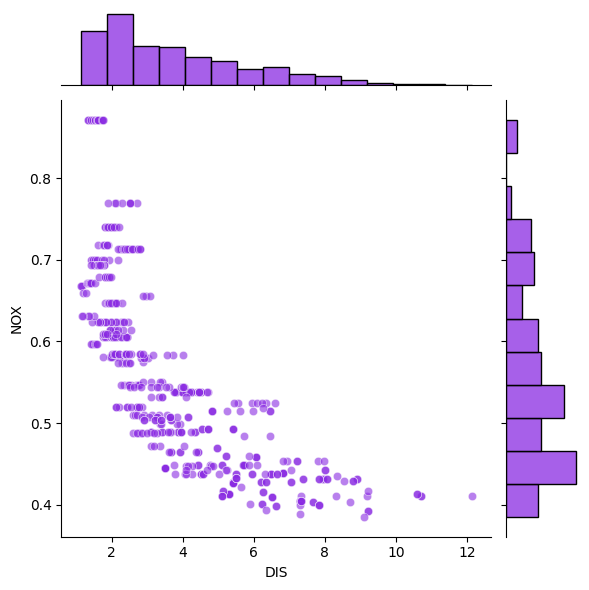

In [ ]:
sns.jointplot(data, x='DIS', y='NOX', joint_kws={"alpha":0.6}, color="blueviolet")

#### Proportion of Non-Retail Industry versus Pollution


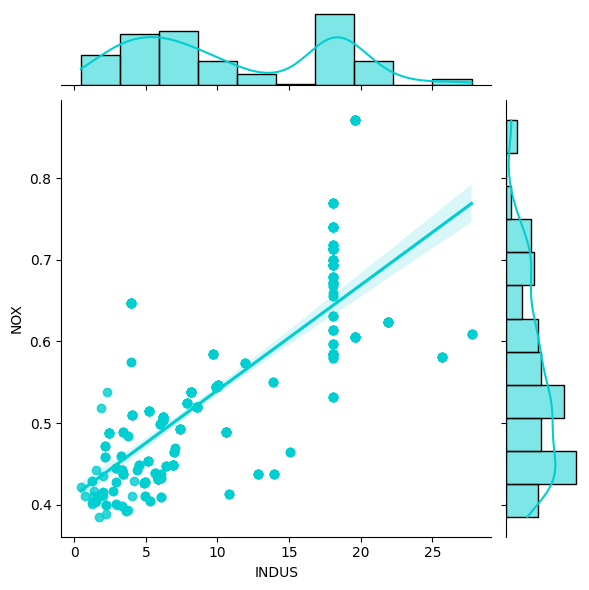

In [ ]:
sns.jointplot(data, x='INDUS', y='NOX',kind="reg", color="darkturquoise")

#### % of Lower Income Population vs Average Number of Rooms


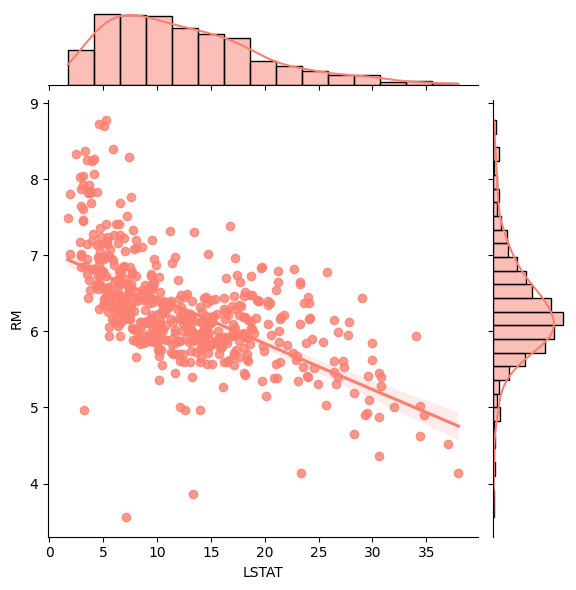

In [ ]:
sns.jointplot(data, x='LSTAT', y='RM', kind="reg", color="salmon")

#### % of Lower Income Population versus Home Price


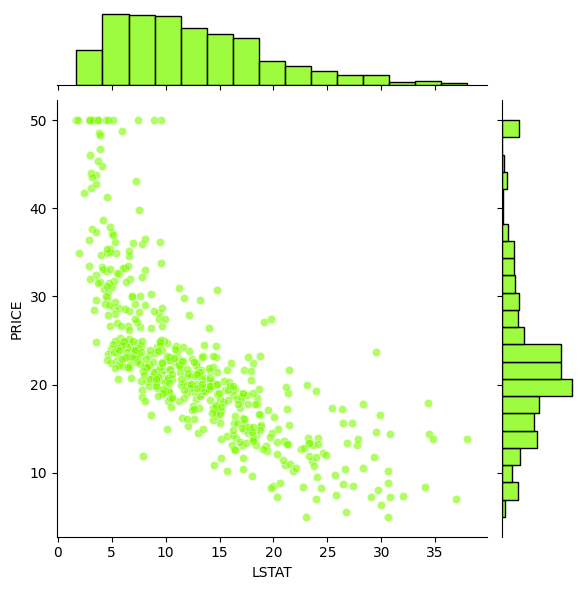

In [ ]:
sns.jointplot(data, x="LSTAT", y='PRICE', joint_kws={"alpha":0.6}, color='lawngreen')

#### Number of Rooms versus Home Value


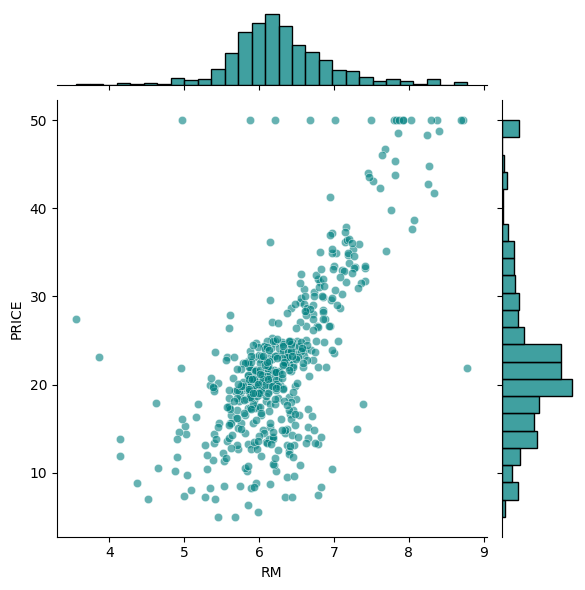

In [ ]:
sns.jointplot(data, x="RM", y='PRICE', joint_kws={"alpha":0.6}, color='teal')

## Train–Test Split

To evaluate model performance on unseen data, we split the dataset into training and testing subsets using an 80/20 ratio.  
`PRICE` is used as the target, and all other columns are used as features.  
A fixed `random_state` ensures reproducibility.


In [ ]:
X = data.drop('PRICE', axis=1)
y = data.PRICE

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=0.2, train_size=0.8)

In [ ]:
train_pct = X_train.shape[0]/X.shape[0] *100
test_pct = X_test.shape[0]/X.shape[0] *100
print(train_pct, test_pct)

79.84189723320159 20.158102766798418


## Train a Linear Regression Model

We now fit a multivariable linear regression model using all available features to predict housing prices.  
Model performance is evaluated using the R² score on the training set.


In [ ]:
regression = LinearRegression()

In [ ]:
regression.fit(X_train, y_train)

LinearRegression()

In [ ]:
r_squred = regression.score(X_train, y_train)
r_squred

0.750121534530608

### Evaluate the Coefficients of the Model


In [ ]:
regression_coef = pd.DataFrame(data= regression.coef_, index=X_train.columns, columns=['coefficient'])

In [ ]:
regression_coef

,coefficient
CRIM,-0.13
ZN,0.06
INDUS,-0.01
CHAS,1.97
NOX,-16.27
RM,3.11
AGE,0.02
DIS,-1.48
RAD,0.30
TAX,-0.01


In [ ]:
premium = regression_coef.loc['RM'].values[0]*1000
premium

np.float64(3108.4562454033)

### Analyse the Estimated Values & Regression Residuals



In [ ]:
predicted_values = regression.predict(X_train)

In [ ]:
residuals = y_train - predicted_values

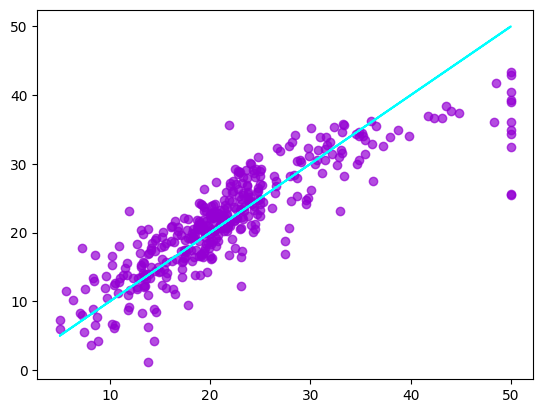

In [ ]:
plt.scatter(x=y_train, y=predicted_values, color='darkviolet', alpha=0.7)
plt.plot(y_train, y_train, color="cyan")
plt.show()

<Axes: ylabel='PRICE'>

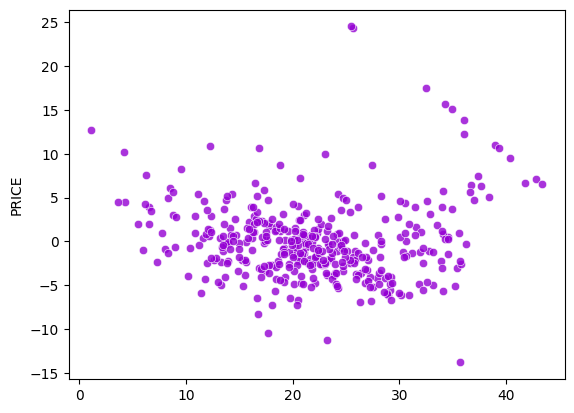

In [ ]:
sns.scatterplot(x=predicted_values, y=residuals, color='darkviolet', alpha=0.8)

## Residual Analysis

We examine the residuals to check for randomness and normality.  
A good model should have residuals centered around zero with minimal skew.  
We visualize the distribution using a histogram with KDE.


In [ ]:
residuals.mean()

np.float64(6.9471381342881085e-16)

In [ ]:
residuals.skew()

np.float64(1.4594428196679727)

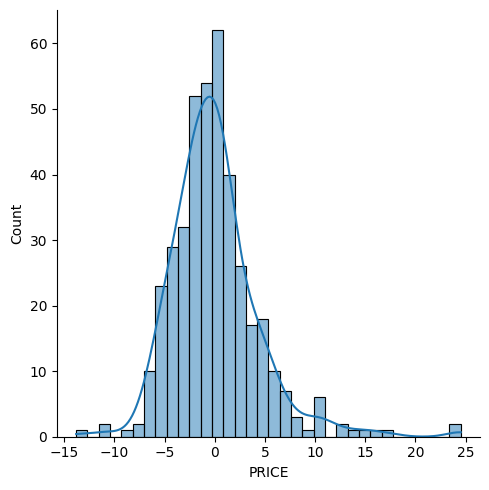

In [ ]:
sns.displot(residuals, kind='hist', kde=True)

We visualize the distribution of `PRICE` using a histogram and KDE, then calculate its skew.  
Next, we apply a log transformation to `PRICE`, replot the distribution, and compare the new skew value to assess improvement.


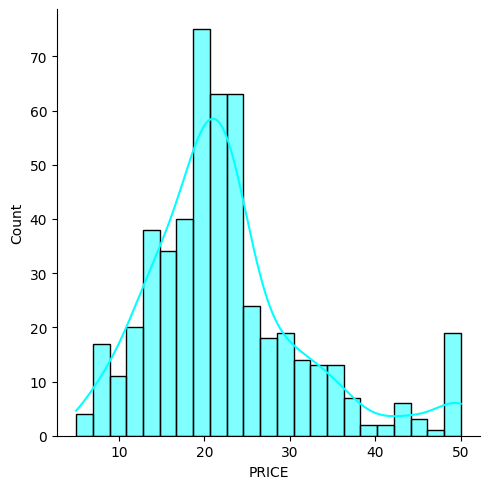

In [ ]:
sns.displot(data.PRICE, kde=True, color='cyan')

In [ ]:
data.PRICE.skew()

np.float64(1.1080984082549072)

In [ ]:
log_price = np.log(data.PRICE)

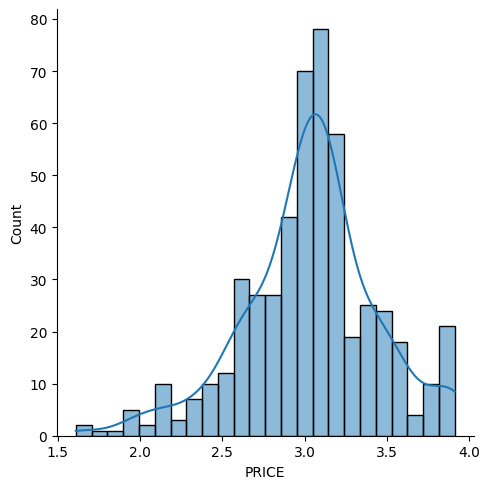

In [ ]:
sns.displot(log_price, kde=True)

In [ ]:
log_price.skew()

np.float64(-0.33032129530987864)

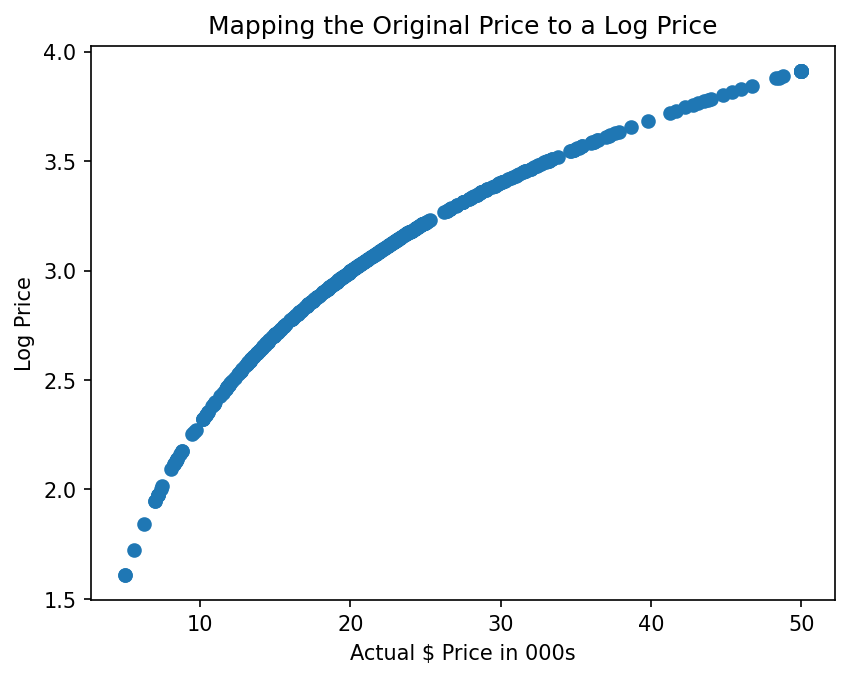

In [ ]:
plt.figure(dpi=150)
plt.scatter(data.PRICE, np.log(data.PRICE))

plt.title('Mapping the Original Price to a Log Price')
plt.ylabel('Log Price')
plt.xlabel('Actual $ Price in 000s')
plt.show()

## Regression using Log Prices



In [ ]:
features = data.drop('PRICE',axis=1)
log_price = np.log(data.PRICE)

In [ ]:
X_train, X_test, log_y_train, log_y_test = train_test_split(features, log_price, random_state=10, test_size=0.2, train_size=0.8)

In [ ]:
log_regr = LinearRegression()

In [ ]:
log_regr.fit(X_train, log_y_train)

LinearRegression()

In [ ]:
log_regr.score(X_train, log_y_train)

0.7930234826697584

In [ ]:
log_predicted = log_regr.predict(X_train)

In [ ]:
log_residuals = log_y_train - log_predicted

In [ ]:
log_residuals.skew()

np.float64(0.09299942594123424)

In [ ]:
log_residuals.mean()

np.float64(-4.7816536209103276e-17)

## Evaluating Coefficients with Log Prices


In [ ]:
log_regr.coef_

array([-1.06717261e-02,  1.57929102e-03,  2.02989827e-03,  8.03305301e-02,
       -7.04068057e-01,  7.34044072e-02,  7.63301755e-04, -4.76332789e-02,
        1.45651350e-02, -6.44998303e-04, -3.47947628e-02,  5.15896157e-04,
       -3.13900565e-02])

In [ ]:
log_coef_df = pd.DataFrame(data=log_regr.coef_, index=X_train.columns, columns=['coefficient'])

In [ ]:
log_coef_df

,coefficient
CRIM,-0.01
ZN,0.00
INDUS,0.00
CHAS,0.08
NOX,-0.70
RM,0.07
AGE,0.00
DIS,-0.05
RAD,0.01
TAX,-0.00


## Regression with Log Prices & Residual Plots


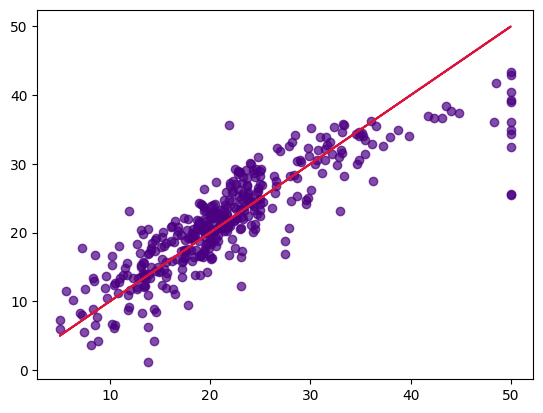

In [ ]:
plt.scatter(x=y_train, y=predicted_values, color='indigo', alpha=0.7)
plt.plot(y_train, y_train, color="crimson")
plt.show()

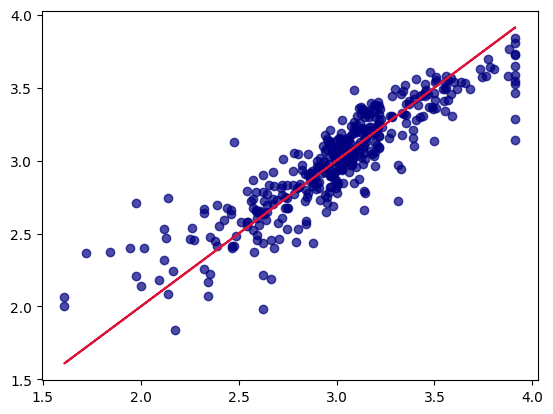

In [ ]:
plt.scatter(log_y_train, log_predicted, color='navy', alpha=0.7)
plt.plot(log_y_train, log_y_train, color='crimson')

<Axes: ylabel='PRICE'>

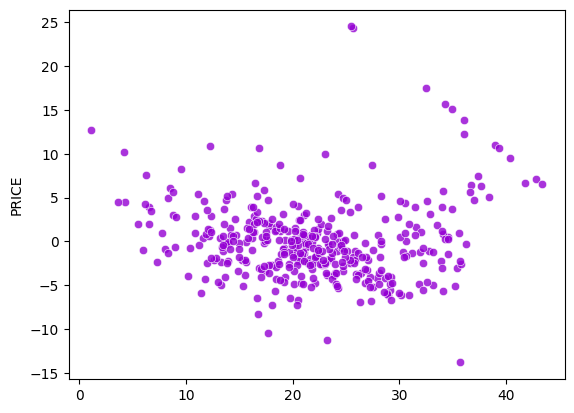

In [ ]:
sns.scatterplot(x=predicted_values, y=residuals, color='darkviolet', alpha=0.8)

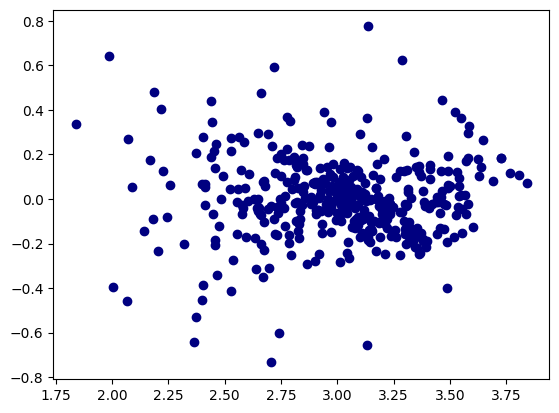

In [ ]:
plt.scatter(log_predicted, log_residuals, color='navy')

We check the mean and skew of residuals after log transformation to evaluate improvement in symmetry and bias.


In [ ]:
log_residuals.skew()

np.float64(0.09299942594123424)

In [ ]:
log_residuals.mean()

np.float64(-4.7816536209103276e-17)

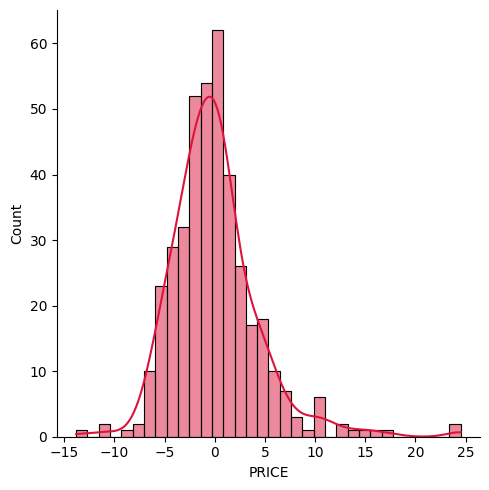

In [ ]:
sns.displot(residuals, kde=True, color='crimson')

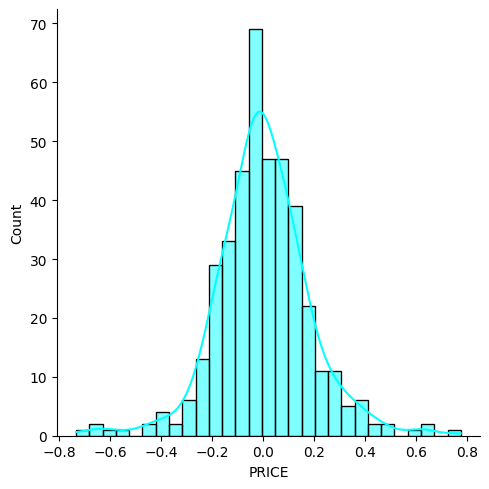

In [ ]:
sns.displot(log_residuals, kde=True, color="cyan")

# Compare Out of Sample Performance


In [ ]:
regression.score(X_test, y_test)

0.6709339839115642

In [ ]:
log_regr.score(X_test, log_y_test)

0.7446922306260739

# Predict a Property's Value using the Regression Coefficients


In [ ]:
# Average Values in the Dataset
features = data.drop(['PRICE'], axis=1)
average_vals = features.mean().values
property_stats = pd.DataFrame(data=average_vals.reshape(1, len(features.columns)),
                              columns=features.columns)
property_stats

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65


Estimate the average log price and convert it to dollar value

In [ ]:
log_price_prediction = log_regr.predict(property_stats)[0]

In [ ]:
log_price_prediction

np.float64(3.030287230563396)

In [ ]:
dollar_est = np.exp(log_price_prediction)*1000

In [ ]:
dollar_est

np.float64(20703.178321023934)

In [ ]:
# value a property with the following characteristics:
next_to_river = True
nr_rooms = 8
students_per_classroom = 20
distance_to_town = 5
pollution = data.NOX.quantile(q=0.75) # high
amount_of_poverty =  data.LSTAT.quantile(q=0.25) # low

In [ ]:
data.sample()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
151,1.50,0.00,19.58,0.00,0.87,5.40,100.00,1.59,5.00,403.00,14.70,341.60,13.28,19.60


In [ ]:
property_stats['RM'] = nr_rooms
property_stats['PTRATIO'] = students_per_classroom
property_stats['DIS'] = distance_to_town
property_stats['NOX'] = pollution
property_stats['LSTAT'] = amount_of_poverty
if next_to_river:
  property_stats['CHAS'] = 1
else:
  property_stats['CHAS'] = 0


In [ ]:
price_predict_log = log_regr.predict(property_stats)[0]

In [ ]:
dollar = np.exp(price_predict_log)*1000

In [ ]:
dollar

np.float64(25792.025872399096)